# Simple linear regression

## Fitting an ordinary least squares linear regression and interpreting results for predictions

### **1. Importing libraries and loading data**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


from ISLP.models import (ModelSpec as MS, summarize, poly)


In [2]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### **2. Simple linear regression using ordinary least sqaures**

### Performing a simple linear regression to predict mpg using horsepower as the predictor. The model uses the sm.OLS() function.

### The results of the model will help determine and answer the following questions:
### i. Does a relationship between the predictor and response?
### ii. How strong is the relationship between predictor and response?
### iii. Is the relationship between predictor and response positive or negative?

In [39]:
# creating a model matrix with an intercept and horsepower
X = MS(['horsepower']).fit_transform(auto)

y = auto['mpg']
model = sm.OLS(y, X)
rslt = model.fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           7.03e-81
Time:                        23:32:05   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### i. Observing the F-statistic as being much larger than 1, and p-value being 0, we can reject the null hypothesis which states that the regression coefficients are 0. We can conclude that the horsepower is statistically significant in explaining changes in the mpg. Therefore we can conclude that a relationship does exist between mpg and horsepower.
### ii. To determine the strength of the relationship, we use the R-sqaured. This is to say that 60.6% of changes in mpg can be explained by changes in horsepower. 60% is a fairly strong relationship but also suggests non-linearity. This will be investigated further below.
### iii. The relationship is negative since we have a negative slope/coef.

### **3. Predictions**

### Predicting mpg associated with horsepower of 98, 120, 200

### First we create a new data set containing the mpg associated with our chosen values

In [40]:
new = pd.DataFrame({'horsepower': [98, 120, 200]})
newx = MS(new).fit_transform(new)
newx

,intercept,horsepower
0,1.0,98
1,1.0,120
2,1.0,200


### Using the get_predict() function from our model, we can get our predictions and extract a 95% confidence interval and a 95% prediction interval

In [42]:
new_pred = rslt.get_prediction(newx);
list(new_pred.predicted_mean)

[24.467077152512427, 20.994493018732047, 8.366914350439753]

### As per the model prediction, a vehicle with a horsepower of 98 will have mpg of 24.47, one with horsepower of 120 will have mpg of 20.99 and horsepower of 200 with an mpg of 8.37

In [45]:
# 95% confidence interval
new_pred.conf_int(alpha= 0.05)

array([[23.97307896, 24.96107534],
       [20.4690916 , 21.51989444],
       [ 7.06198454,  9.67184416]])

### The 95% confidence interval for our mpg at 98 horsepower is (23.97307896, 24.96107534), (20.4690916, 21.51989444) and (7.06198454, 9.67184416) for the horsepower of 120 and 200 repectively

In [46]:
# 95% prediction interval
new_pred.conf_int(obs= True, alpha= 0.05)

array([[14.80939607, 34.12475823],
       [11.33515472, 30.65383131],
       [-1.36599947, 18.09982817]])

### The 95% prediction interval for our mpg at 98 horsepower is (14.80939607, 34.12475823), (11.33515472, 30.65383131) and (-1.36599947, 18.09982817) for the horsepower of 120 and 200 repectively
### As expected, the confidence and prediction intervals are centered around the same mean despite the prediction interval being significantly larger

### **4. Investigating linearity/Non-linearity**
### We check for linearity using a scatterplot and drawing a least squares regression line

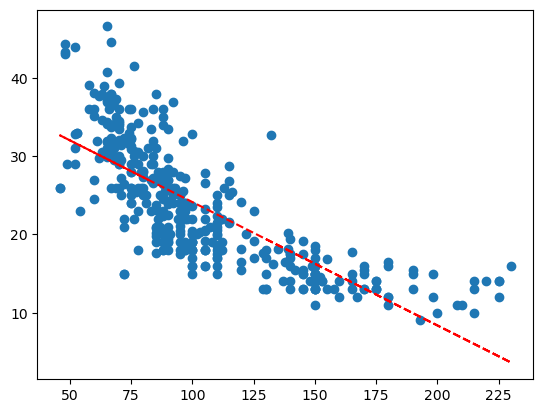

In [37]:
plt.subplots(1,1) #to get both plots in the same figure 
plt.scatter(X['horsepower'], y);
plt.plot(X['horsepower'], rslt.fittedvalues, 'r--');

### Looking at the regression line, there is evidence of non-linearity. This can explain the R-squred of only 60% whereas a stronger relationship would have a much higher percentage 